In [1]:
# importing packages
import pandas as pd
import numpy as np
import json
import seaborn as sns; sns.set() # has to be installed
import matplotlib.pyplot as plt
from sklearn import metrics

In [9]:
# FIRST BEST RUN HYPERPARAMETER SEARCH (based on F1_macro)

In [19]:
# loading the data into a dataframe
with open("/Users/mxm/Google Drive/Masterstudium/Inhalte/4th Semester/NLP/nlp-project/coding/code/exchange_base/Model_Results/Final_long_training_2D_60_epochs/28_CNN_experiment_2D_optimizer_RMSprop_lr_01_epochs_60_batchsize_16_samplerTclassweightsF_True_scheduler_True/all_results_of_model.json") as f:
    json_data = json.load(f)
df = pd.DataFrame(json_data['epochs']) 
def numbers_to_arrays(row):
     predicted_epoch = row['predicted_epoch']
     labels_epoch = row['labels_epoch']
     row['predicted_epoch_array'] = list(map(int, predicted_epoch.split(" ")))
     row['labels_epoch_array'] = list(map(int, labels_epoch.split(" ")))
     return row 
df.stage.replace({'validation': 'Validation', 'training':'Training'}, inplace=True)
df.rename(columns={'stage':'Stage', 'loss':'Loss', 'accuracy':'Accuracy', 'epoch':'Epoch'}, inplace=True)
df = df.apply(numbers_to_arrays, axis=1)

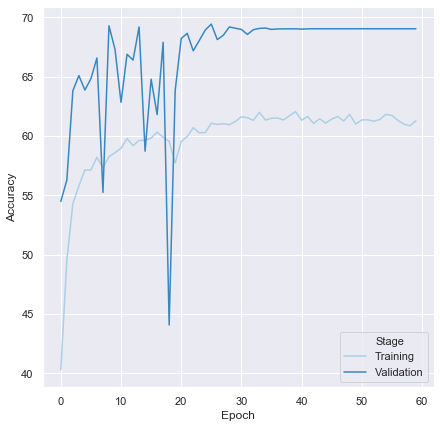

In [20]:
# plotting loss
plt.figure(figsize=(7,7))
ax = sns.lineplot(x="Epoch", y="Accuracy", hue="Stage", data=df, palette='Blues')
fig = ax.get_figure()
fig.savefig("/Users/mxm/Google Drive/Masterstudium/Inhalte/4th Semester/NLP/nlp-project/coding/code/exchange_base/Model_Results/comparing_model_results/accuracy_2D_gs28_final60epochs.pdf", bbox_inches = 'tight',
    pad_inches = 0)

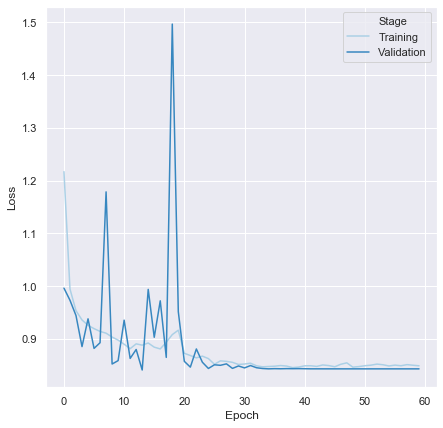

In [21]:
# plotting loss
plt.figure(figsize=(7,7))
ax = sns.lineplot(x="Epoch", y="Loss", hue="Stage", data=df, palette='Blues')
fig = ax.get_figure()
fig.savefig("/Users/mxm/Google Drive/Masterstudium/Inhalte/4th Semester/NLP/nlp-project/coding/code/exchange_base/Model_Results/comparing_model_results/loss_2D_gs28_final60epochs.pdf", bbox_inches = 'tight',
    pad_inches = 0)

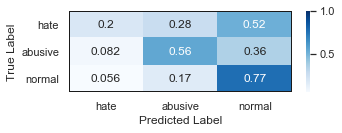

In [17]:
# Plotting Confusion Matrix
# specify epoch
epoch = 5
df = df[df.Stage == 'Validation']
labels = df[df.Epoch == epoch].labels_epoch_array.values[0]
predicted = df[df.Epoch == epoch].predicted_epoch_array.values[0]
confusion_matrix = metrics.confusion_matrix(labels, predicted, normalize='true')
df_cm = pd.DataFrame(confusion_matrix, columns=np.unique(labels), index = np.unique(labels))
df_cm.index.name = 'True Label'
df_cm.columns.name = 'Predicted Label'
plt.figure(figsize=(5,1.5))
ax = sns.heatmap(df_cm, cmap=plt.cm.Blues, annot=True, vmax=1.0, xticklabels=['hate', 'abusive', 'normal'], yticklabels=['hate', 'abusive', 'normal'])
ax.axhline(y=0, color='k',linewidth=1)
ax.axhline(y=df_cm.shape[1], color='k',linewidth=2)
ax.axvline(x=0, color='k',linewidth=1)
ax.axvline(x=df_cm.shape[0], color='k',linewidth=2)
fig = ax.get_figure()
fig = ax.get_figure()
fig.savefig("/Users/mxm/Google Drive/Masterstudium/Inhalte/4th Semester/NLP/nlp-project/coding/code/exchange_base/Model_Results/comparing_model_results/confusion_matrix_1D_gs28_final60epochs_epoch5.pdf", bbox_inches = 'tight',
    pad_inches = 0)

In [18]:
df = df[df.Stage == 'Validation']
classification_report_str = df[df.Epoch == 5].classification_report_str.values
print('|'+ classification_report_str[0], sep=" ", file= open("/Users/mxm/Google Drive/Masterstudium/Inhalte/4th Semester/NLP/nlp-project/coding/code/exchange_base/Model_Results/comparing_model_results/classification_report_1D_gs28_final60epochs_epoch5.txt", 'a'))

In [ ]:
#### END OF Co-Visualisation Pattern ####

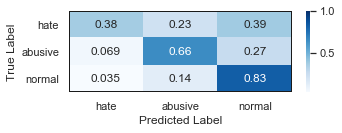

In [24]:
# Testing Results
# loading the data and plotting confusion matrix and classification report

# opening the json file and converting into pandas dataframe
with open("/Users/mxm/Google Drive/Masterstudium/Inhalte/4th Semester/NLP/nlp-project/coding/code/exchange_base/Model_Results/Testing/2D_run27_epoch57_longrun90/testing_CNN_experiment_2D/all_results_of_model.json") as f:
    json_data = json.load(f)


# Confusion Matrix
# function to turn numbers seperated by space into array
def numbers_to_array(numbers):
    array = list(map(int, numbers.split(" ")))
    return array 

predicted = json_data['predicted_epoch']
predicted = numbers_to_array(predicted)
labels = json_data['labels_epoch']
labels = numbers_to_array(labels)

confusion_matrix = metrics.confusion_matrix(labels, predicted, normalize='true')
df_cm = pd.DataFrame(confusion_matrix, columns=np.unique(labels), index = np.unique(labels))
df_cm.index.name = 'True Label'
df_cm.columns.name = 'Predicted Label'
plt.figure(figsize=(5,1.5))
ax = sns.heatmap(df_cm, cmap=plt.cm.Blues, annot=True, vmax=1.0, xticklabels=['hate', 'abusive', 'normal'], yticklabels=['hate', 'abusive', 'normal'])
ax.axhline(y=0, color='k',linewidth=1)
ax.axhline(y=df_cm.shape[1], color='k',linewidth=2)
ax.axvline(x=0, color='k',linewidth=1)
ax.axvline(x=df_cm.shape[0], color='k',linewidth=2)
fig = ax.get_figure()
fig = ax.get_figure()
fig.savefig("/Users/mxm/Google Drive/Masterstudium/Inhalte/4th Semester/NLP/nlp-project/coding/code/exchange_base/Model_Results/Testing/comparing_model_results/confusion_matrix_2D_run27_epoch57_longrun90.pdf", bbox_inches = 'tight',
    pad_inches = 0)

# Classification report
print('|'+ json_data['classification_report_str'], sep=" ", file= open("/Users/mxm/Google Drive/Masterstudium/Inhalte/4th Semester/NLP/nlp-project/coding/code/exchange_base/Model_Results/Testing/comparing_model_results/classification_report_2D_run27_epoch57_longrun90.txt", 'a'))


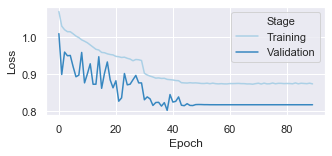

In [129]:
# plotting loss
plt.figure(figsize=(5,2))
ax = sns.lineplot(x="Epoch", y="Loss", hue="Stage", data=df, palette='Blues')
fig = ax.get_figure()
fig.savefig("/Users/mxm/Google Drive/Masterstudium/Inhalte/4th Semester/NLP/nlp-project/coding/code/exchange_base/visualisations/loss_90epochs.pdf", bbox_inches = 'tight',
    pad_inches = 0)

In [130]:
# plotting f1 score macro
ax = sns.lineplot(x="epoch", y="f1_score_macro", hue="stage", data=df)

ValueError: Could not interpret input 'epoch'

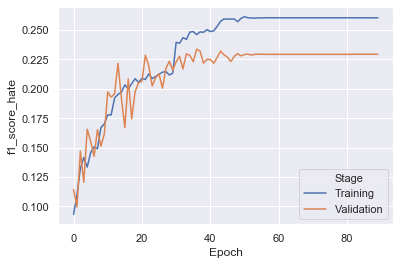

In [131]:
# plotting f1_score hate
ax = sns.lineplot(x="Epoch", y="f1_score_hate", hue="Stage", data=df)

In [132]:
df = df[df.Stage == 'Validation']
classification_report_str = df[df.Epoch == 37].classification_report_str.values
print('|'+ classification_report_str[0], sep=" ")

In [133]:
print('|'+ classification_report_str[0], sep=" ")

|              precision    recall  f1-score   support

           0       0.21      0.26      0.23       966
           1       0.69      0.67      0.68      6969
           2       0.75      0.75      0.75      8678

    accuracy                           0.69     16613
   macro avg       0.55      0.56      0.55     16613
weighted avg       0.69      0.69      0.69     16613



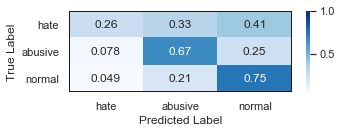

In [134]:
# Plotting Confusion Matrix
# specify epoch
epoch = 37
df = df[df.Stage == 'Validation']
labels = df[df.Epoch == epoch].labels_epoch_array.values[0]
predicted = df[df.Epoch == epoch].predicted_epoch_array.values[0]
confusion_matrix = metrics.confusion_matrix(labels, predicted, normalize='true')
df_cm = pd.DataFrame(confusion_matrix, columns=np.unique(labels), index = np.unique(labels))
df_cm.index.name = 'True Label'
df_cm.columns.name = 'Predicted Label'
plt.figure(figsize=(5,1.5))
ax = sns.heatmap(df_cm, cmap=plt.cm.Blues, annot=True, vmax=1.0, xticklabels=['hate', 'abusive', 'normal'], yticklabels=['hate', 'abusive', 'normal'])
ax.axhline(y=0, color='k',linewidth=1)
ax.axhline(y=df_cm.shape[1], color='k',linewidth=2)
ax.axvline(x=0, color='k',linewidth=1)
ax.axvline(x=df_cm.shape[0], color='k',linewidth=2)
fig = ax.get_figure()
fig.savefig("/Users/mxm/Google Drive/Masterstudium/Inhalte/4th Semester/NLP/nlp-project/coding/code/exchange_base/visualisations/confusion_matrix.pdf", bbox_inches = 'tight',
    pad_inches = 0)

In [135]:
#FIRST BEST RUN BASED FROM GRID SEARCH ACCORDING TO F1 MACRO SCORE

In [136]:
# creating dataframe from epochs in json file
with open("exchange_base/Model_Results/FirstGridSearch/26_CNN_experiment_optimizer_Adam_lr_01_epochs_30_batchsize_16_samplerTclassweightsF_False_scheduler_True/all_results_of_model.json") as f:
    json_data = json.load(f)
df = pd.DataFrame(json_data['epochs']) 

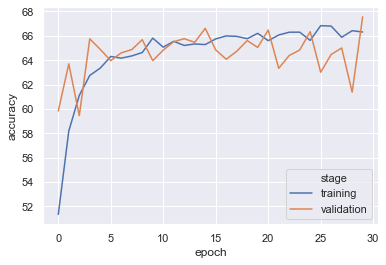

In [137]:
# plotting accuracy
ax = sns.lineplot(x="epoch", y="accuracy", hue="stage", data=df)

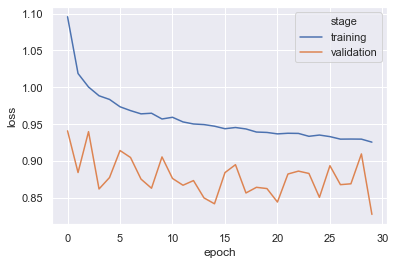

In [138]:
# plotting loss
ax = sns.lineplot(x="epoch", y="loss", hue="stage", data=df)

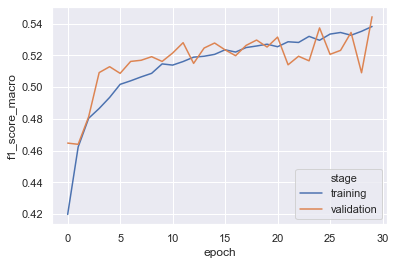

In [139]:
# plotting f1 score macro
ax = sns.lineplot(x="epoch", y="f1_score_macro", hue="stage", data=df)

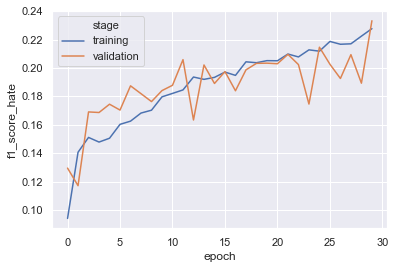

In [140]:
# plotting f1 score hate
ax = sns.lineplot(x="epoch", y="f1_score_hate", hue="stage", data=df)

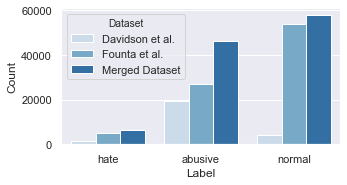

In [144]:

url_davidson = "/Users/mxm/Google Drive/Masterstudium/Inhalte/4th Semester/NLP/nlp-project/coding/data/twitter data/davidson et al/labeled_data.csv"
url_founta = "/Users/mxm/Google Drive/Masterstudium/Inhalte/4th Semester/NLP/nlp-project/coding/data/twitter data/founta et al/hatespeech_text_label_vote.csv"

data_davidson = pd.read_csv(url_davidson, names=["count", "hate_speech", "offensive_language", "neither", "label", "tweet"], header=1)
data_founta = pd.read_csv(url_founta, sep='\t', names=["tweet", "label_text", "count"])

data_founta = data_founta[~data_founta.label_text.str.contains("spam")]
data_founta['label'] = data_founta.label_text.replace({'hateful': '0', 'abusive': '1', 'normal': '2'}).astype('int')

data_resulting = pd.read_csv('/Users/mxm/Google Drive/Masterstudium/Inhalte/4th Semester/NLP/nlp-project/coding/code/exchange_base/data.csv')

data_davidson['Dataset'] = 'Davidson et al.'
data_founta['Dataset'] = 'Founta et al.'
data_resulting['Dataset'] = 'Merged Dataset'
df = pd.concat([data_davidson, data_founta, data_resulting])
df.rename(columns={'label':'Label', 'count':'Count'}, inplace=True)
df.Label.replace({0: 'hate', 1:'abusive', 2:'normal'}, inplace=True)
plt.figure(figsize=(5,2.5))
count = sns.countplot(x="Label", hue="Dataset", data=df, palette='Blues', order = ['hate', 'abusive', 'normal'])
count.set(xlabel="Label", ylabel = "Count")
fig = count.get_figure()

fig.savefig('/Users/mxm/Google Drive/Masterstudium/Inhalte/4th Semester/NLP/nlp-project/coding/code/exchange_base/visualisations/dataset_merging.pdf', bbox_inches = 'tight',
    pad_inches = 0)

In [142]:
len(data_resulting)

110748

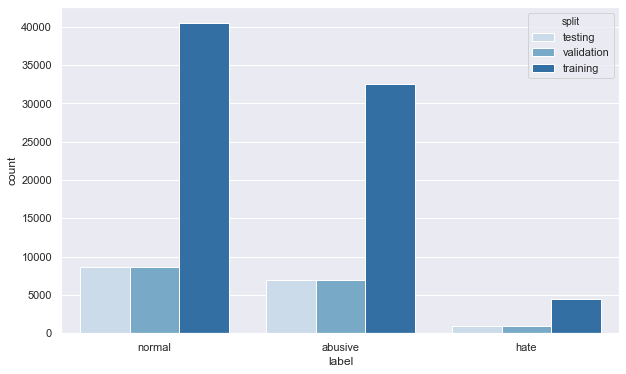

In [143]:
df_test = pd.read_csv("/Users/mxm/Google Drive/Masterstudium/Inhalte/4th Semester/NLP/nlp-project/coding/code/exchange_base/test_set.csv")
df_val = pd.read_csv("/Users/mxm/Google Drive/Masterstudium/Inhalte/4th Semester/NLP/nlp-project/coding/code/exchange_base/val_set.csv")
df_train = pd.read_csv("/Users/mxm/Google Drive/Masterstudium/Inhalte/4th Semester/NLP/nlp-project/coding/code/exchange_base/train_set.csv")
df_test['split'] = 'testing'
df_val['split'] ='validation'
df_train['split']='training'
df = pd.concat([df_test, df_val, df_train])
df.label.replace({0: 'hate', 1:'abusive', 2:'normal'}, inplace=True)
plt.figure(figsize=(10, 6))
sns.countplot(x="label", hue="split", data=df, palette='Blues', )
plt.show()